#  PROJECT OVERVIEW 

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

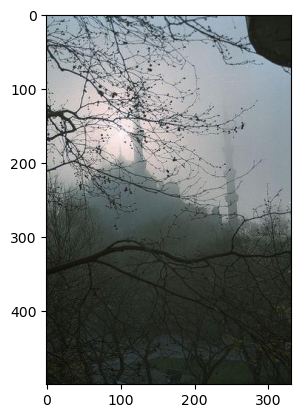

In [15]:
img = mpimg.imread('data/foggy/10533328.jpg')
implt = plt.imshow(img)
plt.show()

# Image Information 

In [6]:
from datetime import date
today = date.today()
imgdateofbirth = date(2022,11,17)
img_day = date(today.year,imgdateofbirth.month,imgdateofbirth.day)
daysuntil_img = (img_day-today).days
daysalive = (today-imgdateofbirth).days
print('img is ' + str(daysalive) + ' days old ')
if daysuntil_img >0:
    print('it\'s' + str(daysuntil_img)+ 'days until img will be completing 1 more year ')
elif daysuntilmybirthday==0:
    print("today one one year !")
else:
    img_day = img_day.replace(year=today.year+1)
    daysuntil_img = (img_day-today).days
    print('you\'ll have to wait ' + str(daysuntil_img) + ' days until next year ')


img is 793 days old 
it's303days until img will be completing 1 more year 


In [7]:
celsius = float(input( " enter the temperature in degree celsius = "))
fahrenheit = (9/5)*celsius+32
print(celsius, "degree c = ",fahrenheit,"degree f ")


 enter the temperature in degree celsius =  2


2.0 degree c =  35.6 degree f 


# Import all libraries according to requirement
# Load the dataset
# Inspect the data
# Build the CNN model and compile it
# How enhence project featues
# Illustrate Basic information of project that help to comprehend things more better
# Train the model
# Evaluate the model
# Visualise the training progress
# Make prediction
# Save the model

 # Image Classification with CNN

In [10]:
!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# Load The Dataset

In [13]:
train_dataset = image_dataset_from_directory(
    'data',  # Path to the directory containing image subdirectories
    image_size=(256, 256),  # Resize images to a uniform size (optional)
    batch_size=32,  # Number of images to load in a batch
    label_mode='int'  # Labels will be integer-encoded (other options: 'categorical' or None)
)

# View the dataset structure (optional)
class_names = train_dataset.class_names
print(f"Class names: {class_names}")

Found 18043 files belonging to 5 classes.
Class names: ['cloudy', 'foggy', 'rainy', 'snowy', 'sunny']


# Get a Batch of Images and Labels

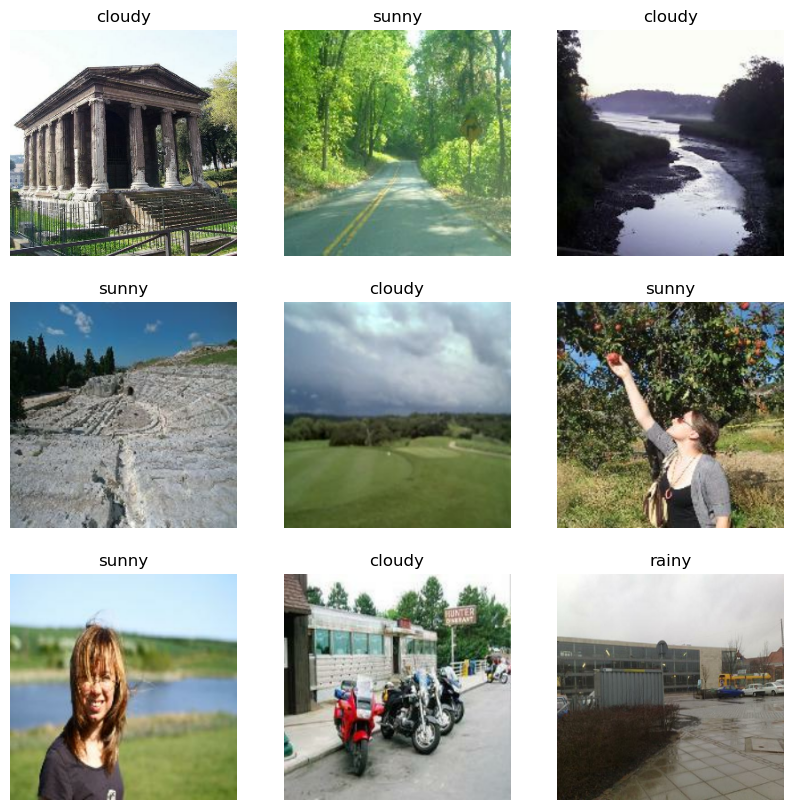

In [15]:
image_batch, label_batch = next(iter(train_dataset))

# Plot the first few images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis('off')
plt.show()

In [16]:
from tensorflow.keras.layers import Rescaling


In [18]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('data')


Found 18043 files belonging to 5 classes.


In [19]:

# Normalize pixel values to be between 0 and 1
train_dataset = train_dataset.map(
    lambda x, y: (Rescaling(1./255)(x), y)
)


In [20]:
# Create a rescaling layer
rescaling_layer = Rescaling(1./255)

In [21]:
# Normalize pixel values to be between 0 and 1 using map
train_dataset = train_dataset.map(
    lambda x, y: (rescaling_layer(x), y)
)

In [22]:

# Check the result
for images, labels in train_dataset.take(1):
    print("Image Shape:", images.shape)  # Print the shape of the image
    print("Image Range:", images.numpy().min(), images.numpy().max())  # Min and max values of the pixel values

Image Shape: (32, 256, 256, 3)
Image Range: 0.0 0.003921569


In [7]:
from tensorflow.keras import layers, models

# Create a CNN Model

In [23]:

model = models.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),  # Input layer with image shape
    layers.Conv2D(32, 3, activation='relu'),  # Convolutional layer with 32 filters
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Conv2D(64, 3, activation='relu'),  # Convolutional layer with 64 filters
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Conv2D(128, 3, activation='relu'),  # Convolutional layer with 128 filters
    layers.MaxPooling2D(),  # Max pooling layer
    layers.Flatten(),  # Flatten the image into a 1D array
    layers.Dense(128, activation='relu'),  # Dense fully connected layer
    layers.Dense(len(class_names), activation='softmax')  # Output layer with softmax activation for multi-class classification
])
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metrics to evaluate model performance
)

# Model summary
model.summary()

C:\Users\Navpreet Singh\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,621 (56.61 MB)

 Trainable params: 14,839,621 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preparation 

In [4]:

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('data',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')


Found 18042 images belonging to 5 classes.
